# Teste do método de Levenberg-Marquardt utilizando a função Rosenbrock

Teste do algoritmo de otimização de Levenberg-Marquardt utilizando a função Rosenbrock. Esta é uma função não-convexa introduzida por Howard H. Rosenbrock em 1960. 

**[Referências]**

https://en.wikipedia.org/wiki/Rosenbrock_function

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Função Rosenbrock

A função Rosenbrock possui um mínimo global que é localizado em um longo e estreito vale de formato parabólico. Esta função é definida como:

$$ f(x,y) = (a-x)^2 + b(y - x^2)^2, $$

em que $(x,y) = (a,a^2)$ é o mínimo global desta função. 

In [2]:
def rosenbrock(x,y):
    '''
    Defining the rosenbrock function.   
    
    '''
    f = (1. - x)**2 + 100.*(y - x**2)**2
    return f

## Definindo as coordenadas para calcular a função

In [3]:
Nx = 30
Ny = 30
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)

In [4]:
X,Y = np.meshgrid(x,y)

In [5]:
Z = rosenbrock(X,Y) 

## Visualizando a função Rosenbrock

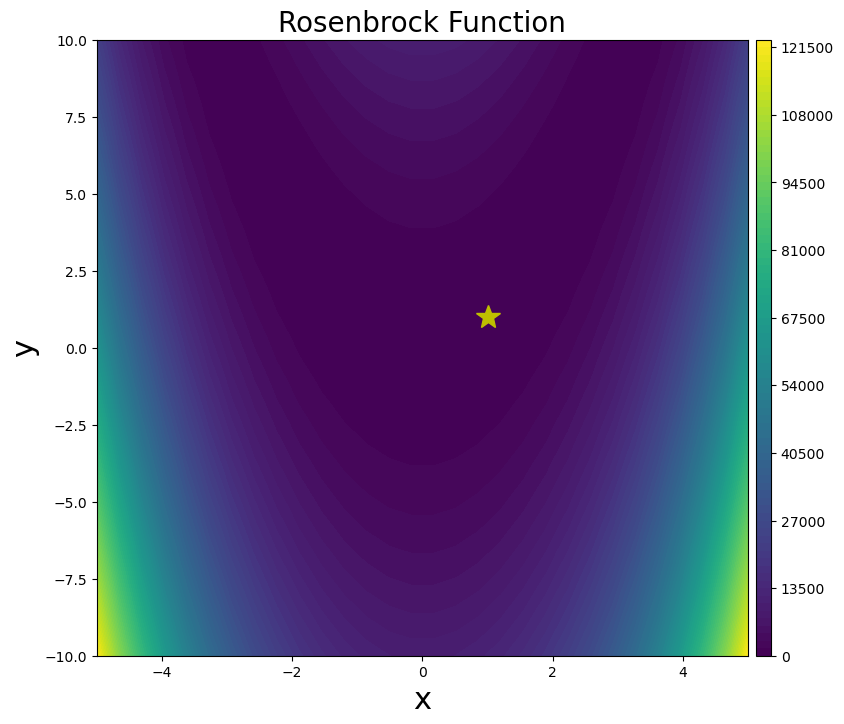

In [6]:
title_font = 22
bottom_font = 16
plt.figure(figsize=(10,8))

plt.contourf(X, Y, Z, 100, cmap='viridis')
plt.plot(1.,1., 'y*',markersize=18)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.title('Rosenbrock Function',fontsize=20)

plt.show()

## Calculando o gradiente

In [7]:
def residual(x,y):
    '''
    Calculate the residual of rosenbrock function.
    '''
    J1 = 10.*(y - x**2)
    J2 = (1. - x)
    r = np.array([J1,J2])
    return r

In [8]:
def sensitivity(x,y):
    '''
    Calculate the sensitivity matrix of rosenbrock function.
    '''
    A11 = -20.*x
    A12 = 10.
    A21 = -1.
    A22 = 0.
    A = np.array([[A11,A12],[A21,A22]])
    return A

## Resolvendo o sistema linear através do método de Levenberg-Marquardt

In [9]:
itmax = 20
itmarq = 10
lamb = 10.

px = []
py = []
p0 = np.array([-1.,5.]) # Chute inicial
px.append(p0[0])
py.append(p0[1])

phi = []
iteration = []
for i in range(itmax):
    r0 = residual(p0[0],p0[1])
    phi0 = np.sqrt(np.sum(r0*r0))    
    for j in range(itmarq):
        G = sensitivity(p0[0],p0[1])
        J = np.dot(G.T,r0)
        H = np.dot(G.T,G) + lamb*np.identity(2)
               
        dp = np.linalg.solve(H,-J)
        p0 += dp
        
        r = residual(p0[0],p0[1])
        phi_plus = np.sqrt(np.sum(r*r))
        
        
        dphi = phi_plus - phi0
        if (dphi < 0) :
            lamb = lamb/15.
        else:
            lamb = 15.*lamb
        
        r0 = r
        phi0 = phi_plus
        
        px.append(p0[0])
        py.append(p0[1])
        phi.append(phi0) 
    
    iteration.append(i)    

### Estimativa para o mínimo da função

In [10]:
p0

array([1., 1.])

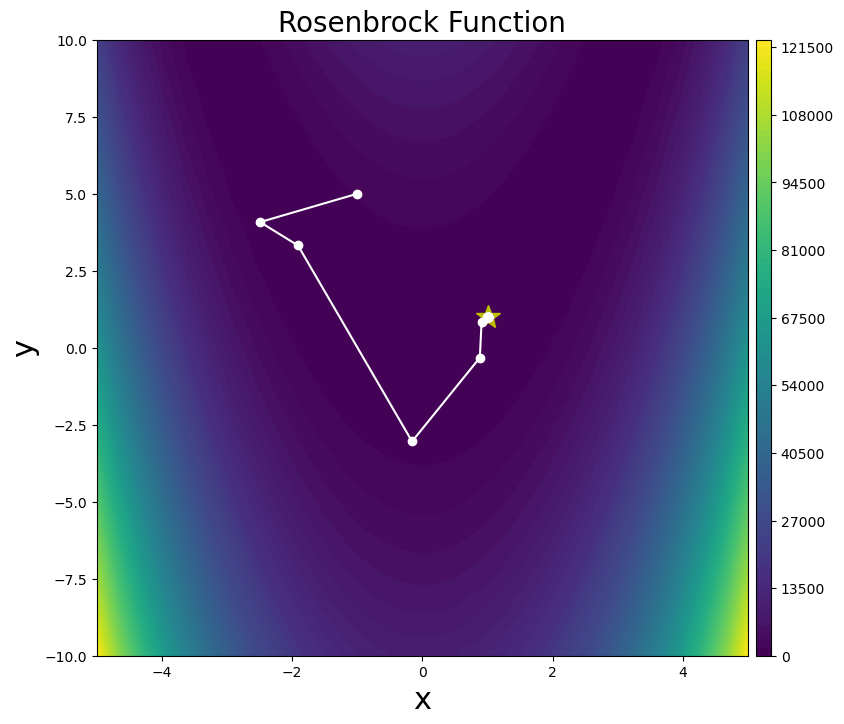

In [12]:
title_font = 22
bottom_font = 16
plt.figure(figsize=(10,8))

plt.contourf(X, Y, Z, 100, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.plot(1.,1., 'y*',markersize=18)
plt.plot(px,py,'wo-')
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.title('Rosenbrock Function',fontsize=20)

plt.show()